In [15]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv("Lectures_src/03.Supervised_learning/datasets/data2.txt", header=None, names=["Test 1", "Test 2", "Engine_ok"])
data

,Test 1,Test 2,Engine_ok
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


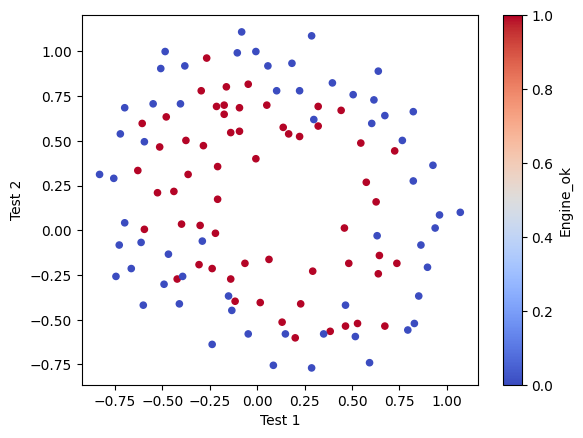

In [7]:
data.plot(kind="scatter", x="Test 1", y="Test 2", c="Engine_ok", cmap=plt.cm.coolwarm);

In [25]:
X_poly = PolynomialFeatures(degree=10).fit_transform(data[["Test 1", "Test 2"]])
X_poly.shape

(118, 66)

In [26]:
X_poly[0]

array([1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
       3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
       2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
       1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
       4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
       1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
       4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01,
       9.30819197e-10, 1.27014235e-08, 1.73316321e-07, 2.36497484e-06,
       3.22710867e-05, 4.40352691e-04, 6.00879959e-03, 8.19926237e-02,
       4.77203078e-11, 6.51163877e-10, 8.88540781e-09, 1.21245165e-07,
       1.65444180e-06, 2.25755614e-05, 3.08053128e-04, 4.20351584e-03,
       5.73587598e-02, 2.44647702e-12, 3.33832185e-11, 4.55528202e-10,
       6.21587589e-09, 8.48182678e-08, 1.15738131e-06, 1.57929597e-05,
       2.15501646e-04, 2.94061154e-03, 4.01258940e-02, 1.25423537e-13,
      

In [31]:
model = LogisticRegression()
model.fit(X_poly, data["Engine_ok"])

LogisticRegression()

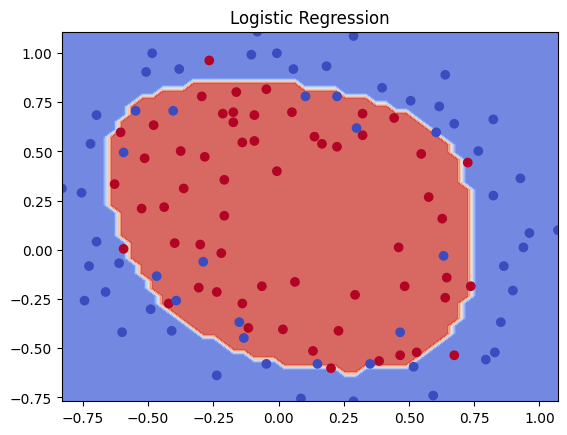

In [32]:
# Plot decision boundary
x_min, x_max = data["Test 1"].min(), data["Test 1"].max()
y_min, y_max = data["Test 2"].min(), data["Test 2"].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

Z = model.predict(PolynomialFeatures(degree=10).fit_transform(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data["Test 1"], data["Test 2"], c=data["Engine_ok"], cmap=plt.cm.coolwarm)
plt.title("Logistic Regression");


In [33]:
model_linear = LogisticRegression()
model_linear.fit(data[["Test 1", "Test 2"]], data["Engine_ok"])

LogisticRegression()

/Users/oscar/miniconda3/envs/lectures/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


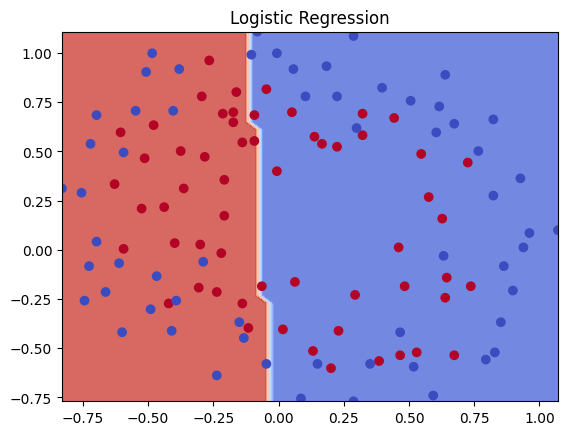

In [34]:
# Plot decision boundary
x_min, x_max = data["Test 1"].min(), data["Test 1"].max()
y_min, y_max = data["Test 2"].min(), data["Test 2"].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))

Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data["Test 1"], data["Test 2"], c=data["Engine_ok"], cmap=plt.cm.coolwarm)
plt.title("Logistic Regression");


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model_tree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
model_tree.fit(data[["Test 1", "Test 2"]], data["Engine_ok"])

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

/Users/oscar/miniconda3/envs/lectures/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


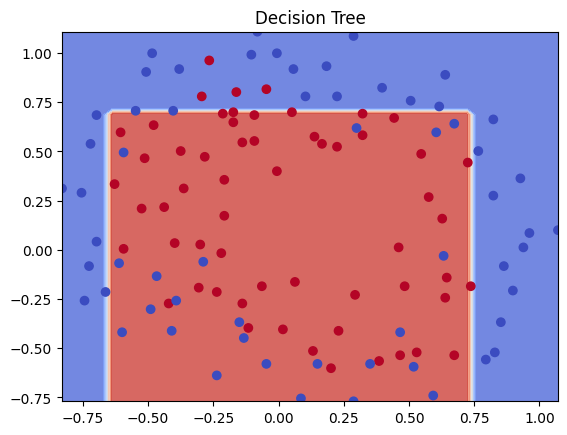

In [40]:
# Plot decision boundary
x_min, x_max = data["Test 1"].min(), data["Test 1"].max()
y_min, y_max = data["Test 2"].min(), data["Test 2"].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data["Test 1"], data["Test 2"], c=data["Engine_ok"], cmap=plt.cm.coolwarm)
plt.title("Decision Tree");